In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
import seaborn as  sns

In [2]:
#Now importing the data, We are importing csv file

In [4]:
df = pd.read_csv(r'D:\Credit  card data\LoanApprovalPrediction.csv')

In [5]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
df.shape

(598, 13)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         577 non-null    float64
 9   Loan_Amount_Term   584 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 60.9+ KB


In [10]:
# Now we will process the  data and after that do visualization

In [27]:
obj = (df.dtypes == 'object')
obj_col = len(list(obj[obj].index))
print("categorical variable: ",obj_col)

categorical variable:  6


In [28]:
df.drop(['Loan_ID'], axis=1, inplace=True)

KeyError: "['Loan_ID'] not found in axis"

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             598 non-null    object 
 1   Married            598 non-null    object 
 2   Dependents         586 non-null    float64
 3   Education          598 non-null    object 
 4   Self_Employed      598 non-null    object 
 5   ApplicantIncome    598 non-null    int64  
 6   CoapplicantIncome  598 non-null    float64
 7   LoanAmount         577 non-null    float64
 8   Loan_Amount_Term   584 non-null    float64
 9   Credit_History     549 non-null    float64
 10  Property_Area      598 non-null    object 
 11  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(6)
memory usage: 56.2+ KB


In [17]:
#this shows us that 'load id' coloumn is successfully dropped.

In [18]:
# Now we are going to visualize all the unique  values using barplot.

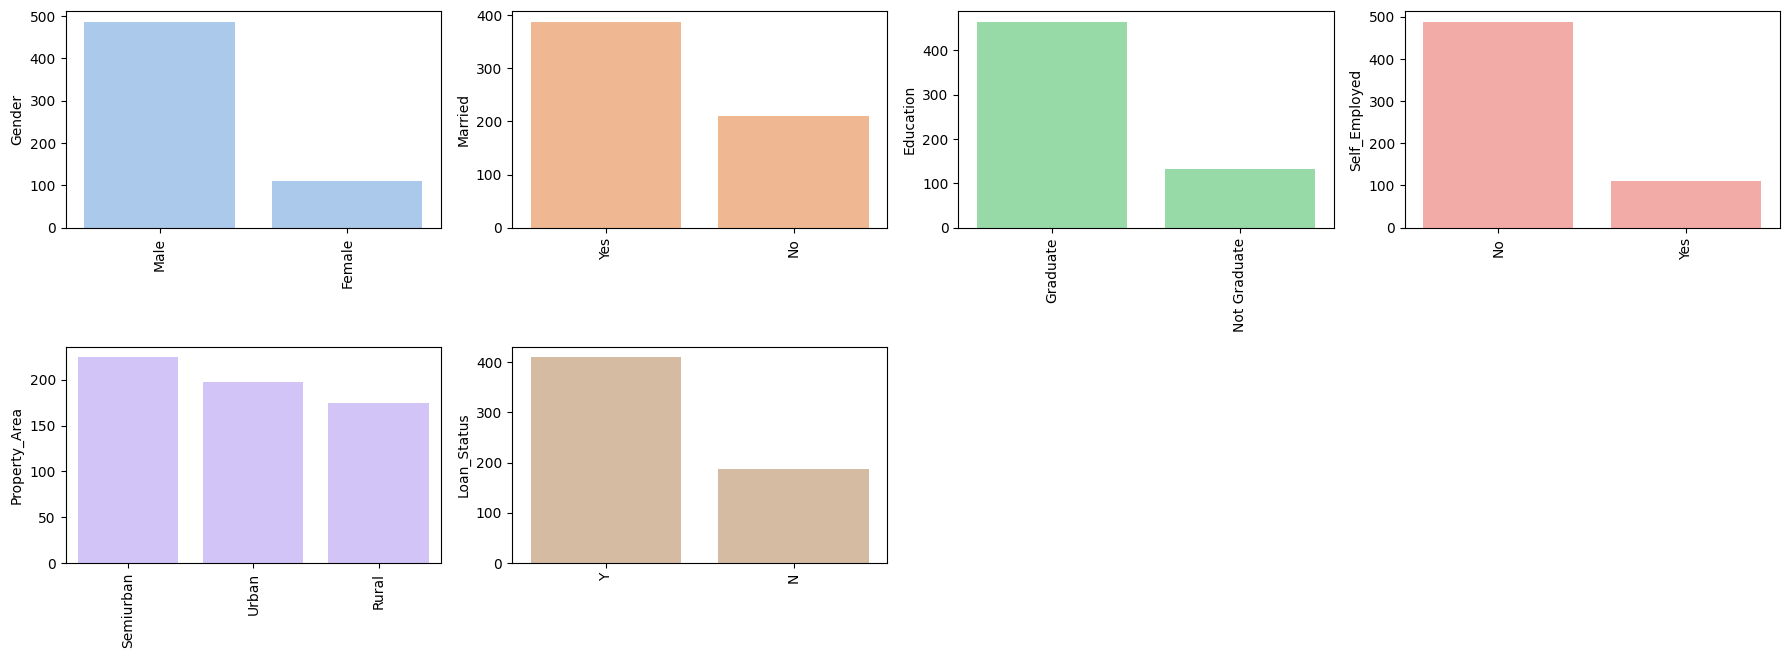

In [40]:
obj = (df.dtypes == 'object') 
object_cols = list(obj[obj].index) 
plt.figure(figsize=(18,36)) 
index = 1

colors = sns.color_palette("pastel", n_colors=len(object_cols))

for col, color in zip(object_cols, colors): 
  y = df[col].value_counts() 
  plt.subplot(11,4,index) 
  plt.xticks(rotation=90) 
  sns.barplot(x=list(y.index), y=y, color=color)
  plt.ylabel(col)
    
  index +=1
plt.tight_layout()
plt.show()


In [41]:
#As all the categorical values are binary so we can use Label Encoder for all such columns and the values will change into int datatype.

In [42]:
from sklearn import preprocessing

In [44]:
label_enco = preprocessing.LabelEncoder()
obj = (df.dtypes == 'object')
for col in list(obj[obj].index):
    df[col] = label_enco.fit_transform(df[col])

In [ ]:
#crosschecking if there is any  field left in categorical variable

In [45]:
obj = (df.dtypes == 'object')
obj_col = len(list(obj[obj].index))
print("categorical variable: ",obj_col)

categorical variable:  0


In [46]:
# Now we will create heatmap in order to understand the correlation between variables

Correlation coefficient:                       Gender   Married  Dependents  Education  Self_Employed  \
Gender             1.000000  0.369612    0.175970   0.048478      -0.028663   
Married            0.369612  1.000000    0.350464   0.014369      -0.021441   
Dependents         0.175970  0.350464    1.000000   0.059227       0.040892   
Education          0.048478  0.014369    0.059227   1.000000      -0.015204   
Self_Employed     -0.028663 -0.021441    0.040892  -0.015204       1.000000   
ApplicantIncome    0.057386  0.042487    0.084485  -0.139349       0.140406   
CoapplicantIncome  0.083080  0.073830    0.034596  -0.065205       0.020877   
LoanAmount         0.106712  0.147602    0.131023  -0.169563       0.118304   
Loan_Amount_Term  -0.083462 -0.102360   -0.100326  -0.080760      -0.034053   
Credit_History     0.017336  0.013565   -0.046950  -0.075207       0.030774   
Property_Area     -0.025794  0.009224    0.007816  -0.061758      -0.023149   
Loan_Status        0.02123

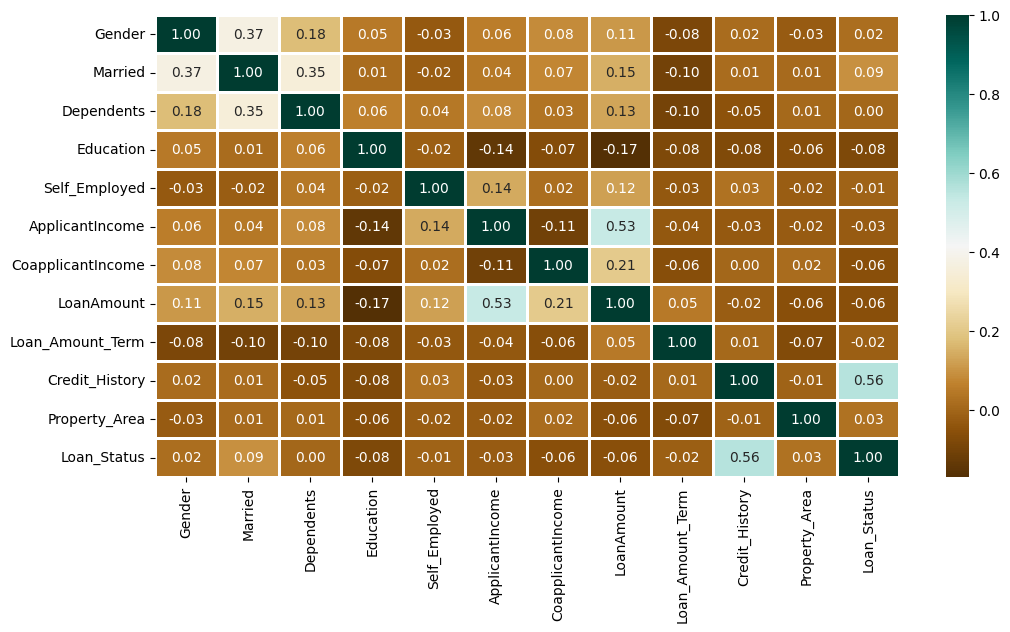

In [49]:
plt.figure(figsize=(12,6))

sns.heatmap(df.corr(),
            cmap='BrBG',
            fmt='.2f',
            linewidths=2,
            annot=True)
print("Correlation coefficient: ", df.corr())

In [50]:
# Above heatmap we can see that there is correlation between applicant income and loan amount 
#as welll as credit history and loan status this means that higher the ApplicantIncome higher the loan amount similarly 
#loan status also depend on credit history.

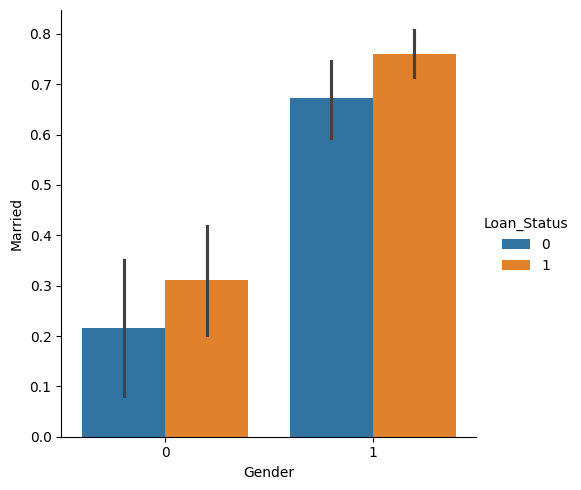

In [55]:
sns.catplot(x='Gender',y='Married',
           hue='Loan_Status',
           kind='bar',
           data=df)

In [57]:
#Lets check null value in our data set

In [58]:
for col in df.columns:
    df[col] = df[col].fillna(df[col].mean())
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [59]:
#Now will train our model

In [62]:
from sklearn.model_selection import train_test_split
X = df.drop(['Loan_Status'],axis=1)
Y = df['Loan_Status']

In [63]:
X.shape


(598, 11)

In [64]:
Y.shape

(598,)

In [66]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=1)

In [67]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((358, 11), (240, 11), (358,), (240,))

In [69]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics 

In [70]:
knn = KNeighborsClassifier(n_neighbors=3) 
rfc = RandomForestClassifier(n_estimators = 7, 
                             criterion = 'entropy', 
                             random_state =7) 
svc = SVC() 
lc = LogisticRegression()

In [72]:
# making predictions on the training set 
for clf in (rfc, knn, svc,lc): 
    clf.fit(X_train, Y_train) 
    Y_pred = clf.predict(X_train) 
    print("Accuracy score of ", 
          clf.__class__.__name__, 
          "=",100*metrics.accuracy_score(Y_train,  
                                         Y_pred))

Accuracy score of  RandomForestClassifier = 98.04469273743017
Accuracy score of  KNeighborsClassifier = 78.49162011173185
Accuracy score of  SVC = 68.71508379888269
Accuracy score of  LogisticRegression = 79.60893854748603


C:\Users\QCC\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [74]:
#making predictions on the testing set 
for clf in (rfc, knn, svc,lc): 
    clf.fit(X_train, Y_train) 
    Y_pred = clf.predict(X_test) 
    print("Accuracy score of ", 
          clf.__class__.__name__,"=", 
          100*metrics.accuracy_score(Y_test, 
                                     Y_pred))

Accuracy score of  RandomForestClassifier = 82.5
Accuracy score of  KNeighborsClassifier = 63.74999999999999
Accuracy score of  SVC = 69.16666666666667
Accuracy score of  LogisticRegression = 80.83333333333333


C:\Users\QCC\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
